In [ ]:
# Importing the libraries
import cv2
import numpy as np
import pandas as pd
!pip install qrcode
import qrcode
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Function generates a QR and puts on "img"
def get_QR(img):
  qr_data = "QR Code Data"  # Data to encode in the QR code
  height = int(np.random.uniform(50, 100))
  width = int(np.random.uniform(50, 100))  # Size of the QR code

  qr_version = None  # Version of the QR code (None for auto)
  qr_error_correction = qrcode.constants.ERROR_CORRECT_H  # Error correction level

  # Generate QR code
  qr = qrcode.QRCode(version=qr_version, error_correction=qr_error_correction)
  qr.add_data(qr_data)
  qr.make()
  #qr_img = qr.make_image(fill_color="black", back_color="white")

  qr_img = qr.make_image(fill_color="black", back_color="white").convert('RGB')

  # Resize QR code
  qr_img = cv2.resize(np.array(qr_img), (width, height))

  # Choose a random location to insert QR code
  x = np.random.randint(0, img.shape[1] - width)
  y = np.random.randint(0, img.shape[0] - height)

  # Insert QR code into image
  ret = img.copy()
  ret[y:y + height, x:x + width, :] = qr_img

  return ret,(y,x,height,width)

In [ ]:
image_path = '/content/drive/MyDrive/AIP/Assignment_1/classification_dataset/test/bear/009_0081.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img,(224,224))
qr_img,(top,left,height,width) = get_QR(img) 

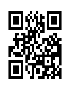

In [ ]:
cv2_imshow(qr_img[top:top+height,left:left+width,:])

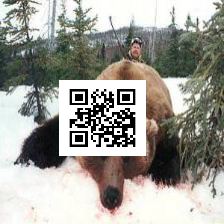

In [ ]:
cv2_imshow(qr_img)

In [ ]:
import pandas as pd

# Create a DataFrame with five columns for storing bounding box coordinates of QR in image
df = pd.DataFrame(columns=["File_name", "top", "left", "height", "width"])

In [ ]:
# Returns randomly cropped image
def get_randomly_cropped(img):
  height, width = img.shape[:2]

  # Define minimum and maximum crop sizes
  min_crop_size = 0.5
  max_crop_size = 0.9

  # Generate random crop size
  crop_size = np.random.uniform(min_crop_size, max_crop_size)

  # Calculate crop dimensions
  crop_width = int(width * crop_size)
  crop_height = int(height * crop_size)

  # Generate random top-left corner for crop
  x = np.random.randint(0, width - crop_width)
  y = np.random.randint(0, height - crop_height)

  # Crop image
  cropped_img = img[y:y+crop_height, x:x+crop_width]

  # Resize cropped image to original size
  resized_img = cv2.resize(cropped_img, (width, height))

  return resized_img

# Returns randomly rotated image
def get_randomly_rotated(img):
  # Generate random rotation angle between -10 and 10 degrees
  angle = np.random.randint(-90, 90)

  # Get image dimensions
  height, width = img.shape[:2]

  # Calculate rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

  # Apply rotation to image
  rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))

  return rotated_img


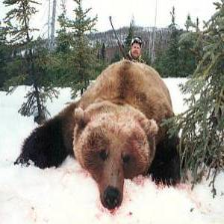

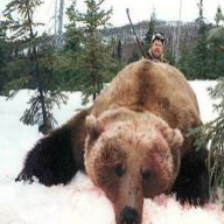

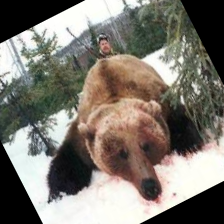

In [ ]:
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
crop = get_randomly_cropped(img)
rotate = get_randomly_rotated(img)
cv2_imshow(img)
cv2_imshow(crop)
cv2_imshow(rotate)

In [ ]:
import os
import glob

# Directory containing the images
image_dir = "/content/drive/MyDrive/AIP/Assignment_2/PascalVOC/test/Images"
data_path = "/content/drive/MyDrive/QR/dataset/"

num = 1
# Iterate over every JPEG image in the directory
for image_path in glob.glob(os.path.join(image_dir, "*.jpg")):

    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))

    qr_img,(top,left,height,width) = get_QR(img) 
    file_name = data_path+str(num)+".jpg"
    cv2.imwrite(file_name,qr_img)

    new_row = {"File_name": file_name, "top": top, "left": left, "height": height, "width": width}
    new_row = pd.DataFrame([new_row])
    df = pd.concat([df, new_row], ignore_index=True)

    crop = get_randomly_cropped(img)
    qr_img,(top,left,height,width) = get_QR(crop) 
    file_name = data_path+str(num)+"_crop.jpg"
    cv2.imwrite(file_name,qr_img)

    new_row = {"File_name": file_name, "top": top, "left": left, "height": height, "width": width}
    new_row = pd.DataFrame([new_row])
    df = pd.concat([df, new_row], ignore_index=True)

    rotate = get_randomly_rotated(img)
    qr_img,(top,left,height,width) = get_QR(rotate) 
    file_name = data_path+str(num)+"_rotate.jpg"
    cv2.imwrite(file_name,qr_img)

    new_row = {"File_name": file_name, "top": top, "left": left, "height": height, "width": width}
    new_row = pd.DataFrame([new_row])
    df = pd.concat([df, new_row], ignore_index=True)
    print(num)
    num+=1



In [ ]:
df.head()

,File_name,top,left,height,width
0,/content/drive/MyDrive/QR/dataset/1.jpg,56,41,75,50
1,/content/drive/MyDrive/QR/dataset/1_crop.jpg,141,162,51,61
2,/content/drive/MyDrive/QR/dataset/1_rotate.jpg,138,2,78,68
3,/content/drive/MyDrive/QR/dataset/2.jpg,23,84,83,86
4,/content/drive/MyDrive/QR/dataset/2_crop.jpg,143,94,70,76


In [ ]:
df['File_name'] = df['File_name'].apply(lambda x: x.split('/')[-1])

In [ ]:
df.head()

,File_name,top,left,height,width
0,1.jpg,56,41,75,50
1,1_crop.jpg,141,162,51,61
2,1_rotate.jpg,138,2,78,68
3,2.jpg,23,84,83,86
4,2_crop.jpg,143,94,70,76


In [ ]:
df.to_csv("/content/drive/MyDrive/QR/bounding_boxes.csv")

In [ ]:
df.head()

,Unnamed: 0,File_name,top,left,height,width
0,0,1.jpg,56,41,75,50
1,1,1_crop.jpg,141,162,51,61
2,2,1_rotate.jpg,138,2,78,68
3,3,2.jpg,23,84,83,86
4,4,2_crop.jpg,143,94,70,76
